In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split  
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import itertools
from sklearn.model_selection import KFold
%matplotlib inline
import itertools
import csv

In [2]:
mushroom = pd.read_csv("newMushroom33noise.csv", sep=',')
mushroom.head()

,Unnamed: 0,Cap-shape,Cap-surface,Cap-color,Bruises,Odor,Gill-attachment,Gill-spacing,Gill-size,Gill-color,...,Stalk-color-above-ring,Stalk-color-below-ring,Veil-type,Veil-color,Ring-number,Ring-type,Spore-print-color,Population,Habitat,Class
0,0,1,0,-3,-3,-4,1,-7,-3,-2,...,1,-7,-3,4,3,3,-5,-4,2,p
1,1,0,0,1,1,1,0,0,1,0,...,0,0,1,0,2,0,1,1,1,e
2,2,1,0,2,1,2,0,0,1,1,...,0,0,1,0,2,0,1,1,2,e
3,3,-4,0,0,0,1,2,4,-1,0,...,2,0,2,-2,2,5,4,0,-5,p
4,4,0,0,3,0,3,0,1,1,0,...,0,0,1,0,2,1,1,2,1,e


In [3]:
appendicitis = pd.read_csv("appendicitis33noise.csv", sep=',')
appendicitis.head()

,Unnamed: 0,At1,At2,At3,At4,At5,At6,At7,Class
0,0,-1.469748,2.377381,0.285122,0.385282,1.148525,1.694152,0.736034,1
1,1,0.458000,0.714000,0.468000,0.111000,0.102000,0.741000,0.436000,1
2,2,0.102000,0.518000,0.111000,0.056000,0.022000,0.506000,0.086000,1
3,3,-0.071088,0.461360,-0.314657,1.432099,-0.282688,0.814856,-0.277706,1
4,4,0.236000,0.804000,0.289000,0.111000,0.066000,0.756000,0.241000,1


In [4]:
Glass = pd.read_csv("glass33noise.csv")
Glass.head()

,Unnamed: 0,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,0,1.032122,13.021202,5.053186,0.840775,69.811680,0.034397,8.376316,2.273795,-0.154925,1
1,1,1.517610,13.890000,3.600000,1.360000,72.730000,0.480000,7.830000,0.000000,0.000000,1
2,2,1.516180,13.530000,3.550000,1.540000,72.990000,0.390000,7.780000,0.000000,0.000000,1
3,3,1.927928,12.598376,4.216568,0.225725,73.227475,0.398198,6.976058,0.904381,0.969481,1
4,4,1.517420,13.270000,3.620000,1.240000,73.080000,0.550000,8.070000,0.000000,0.000000,1


In [5]:
print(mushroom.shape)
print(mushroom.groupby('Class').size())

(5644, 24)
Class
e    3488
p    2156
dtype: int64


In [6]:
print(appendicitis.shape)
print(appendicitis.groupby('Class').size())

(106, 9)
Class
0    85
1    21
dtype: int64


In [7]:
print(Glass.shape)
print(Glass.groupby("Class").size())

(214, 11)
Class
1    70
2    76
3    17
5    13
6     9
7    29
dtype: int64


In [8]:
data_mushroom = mushroom.iloc[:,1:23]
labels_mushroom = mushroom.iloc[:,23].astype(str)
print (data_mushroom)

      Cap-shape   Cap-surface   Cap-color   Bruises   Odor   Gill-attachment  \
0             1             0          -3        -3     -4                 1   
1             0             0           1         1      1                 0   
2             1             0           2         1      2                 0   
3            -4             0           0         0      1                 2   
4             0             0           3         0      3                 0   
5            -1             2           1         0      0                -1   
6             4             2          -1         2      1                 0   
7             1             1           2         1      2                 0   
8             0             1           2         1      0                 0   
9             0            -6           2        -1      3                 0   
10            3            -4           0         3      3                -5   
11            5            -2           

In [9]:
# x = data_nursery.values.astype(np.float32) #returns a numpy array
# min_max_scaler = MinMaxScaler()
# x_scaled = min_max_scaler.fit_transform(x)
# df = pd.DataFrame(x_scaled)
# nursery = pd.concat([df, labels_nursery], axis=1)

In [10]:
data_appendicitis = appendicitis.iloc[:,1:8]
labels_appendicitis = appendicitis.iloc[:,8].astype(str)
print (labels_appendicitis)

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
76     0
77     0
78     0
79     0
80     0
81     0
82     0
83     0
84     0
85     0
86     0
87     0
88     0
89     0
90     0
91     0
92     0
93     0
94     0
95     0
96     0
97     0
98     0
99     0
100    0
101    0
102    0
103    0
104    0
105    0
Name: Class, Length: 106, dtype: object


In [11]:
# x = data_poker.values.astype(np.float32) #returns a numpy array
# min_max_scaler = MinMaxScaler()
# x_scaled = min_max_scaler.fit_transform(x)
# df = pd.DataFrame(x_scaled)
# poker2 = pd.concat([df, labels_poker], axis=1)

In [12]:
data_Glass = Glass.iloc[:,1:10]
labels_Glass = Glass.iloc[:,10].astype(str)
print (data_Glass)

           RI         Na        Mg        Al         Si         K        Ca  \
0    1.032122  13.021202  5.053186  0.840775  69.811680  0.034397  8.376316   
1    1.517610  13.890000  3.600000  1.360000  72.730000  0.480000  7.830000   
2    1.516180  13.530000  3.550000  1.540000  72.990000  0.390000  7.780000   
3    1.927928  12.598376  4.216568  0.225725  73.227475  0.398198  6.976058   
4    1.517420  13.270000  3.620000  1.240000  73.080000  0.550000  8.070000   
5    2.158939  14.144052  4.146414  1.483434  71.275505  0.652500  8.240320   
6    1.927698  12.688376  4.126568  0.075725  73.707475  0.408198  6.926058   
7    1.517560  13.150000  3.610000  1.050000  73.240000  0.570000  8.240000   
8    1.519180  14.040000  3.580000  1.370000  72.080000  0.560000  8.300000   
9    1.927818  12.388376  4.126568  0.295725  73.607475  0.398198  7.156058   
10   0.616554  12.712827  3.496618  2.365051  70.614205  0.816199  8.960259   
11   1.517630  12.800000  3.660000  1.270000  73.010

In [13]:
# x = data_market.values.astype(np.float32) #returns a numpy array
# min_max_scaler = MinMaxScaler()
# x_scaled = min_max_scaler.fit_transform(x)
# df = pd.DataFrame(x_scaled)
# market = pd.concat([df, labels_market], axis=1)

In [14]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [15]:
kf = KFold(n_splits=2, shuffle=True)

## SVM for Mushroom Dataset

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           p       0.76      1.00      0.86      1741
           e       1.00      0.49      0.66      1081

   micro avg       0.80      0.80      0.80      2822
   macro avg       0.88      0.75      0.76      2822
weighted avg       0.85      0.80      0.78      2822

accuracy:  0.8047484053862509


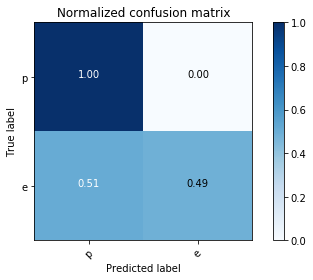

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           p       0.76      1.00      0.86      1747
           e       1.00      0.48      0.65      1075

   micro avg       0.80      0.80      0.80      2822
   macro avg       0.88      0.74      0.76      2822
weighted avg       0.85      0.80      0.78      2822

accuracy:  0.8033309709425939


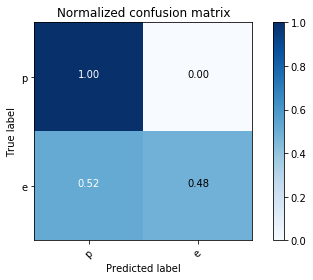

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           p       0.76      1.00      0.87      1726
           e       1.00      0.51      0.68      1096

   micro avg       0.81      0.81      0.81      2822
   macro avg       0.88      0.76      0.77      2822
weighted avg       0.86      0.81      0.79      2822

accuracy:  0.8114812189936216


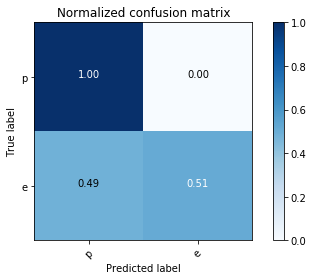

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           p       0.76      1.00      0.86      1762
           e       1.00      0.46      0.63      1060

   micro avg       0.80      0.80      0.80      2822
   macro avg       0.88      0.73      0.75      2822
weighted avg       0.85      0.80      0.77      2822

accuracy:  0.797661233167966


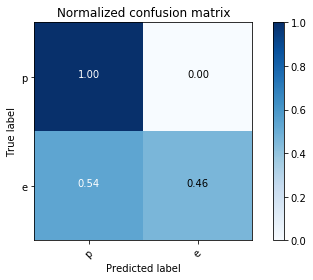

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           p       0.75      1.00      0.86      1712
           e       1.00      0.49      0.66      1110

   micro avg       0.80      0.80      0.80      2822
   macro avg       0.88      0.74      0.76      2822
weighted avg       0.85      0.80      0.78      2822

accuracy:  0.7990786676116229


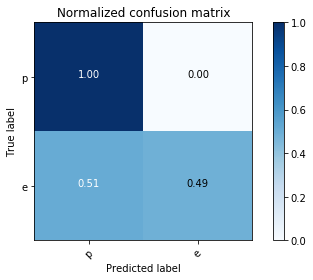

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           p       0.77      1.00      0.87      1776
           e       1.00      0.48      0.65      1046

   micro avg       0.81      0.81      0.81      2822
   macro avg       0.88      0.74      0.76      2822
weighted avg       0.85      0.81      0.79      2822

accuracy:  0.8090007087172219


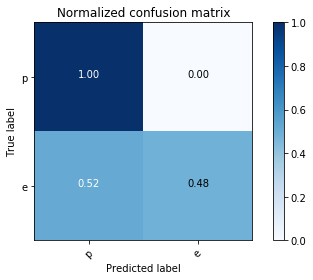

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           p       0.76      1.00      0.86      1760
           e       1.00      0.48      0.65      1062

   micro avg       0.80      0.80      0.80      2822
   macro avg       0.88      0.74      0.76      2822
weighted avg       0.85      0.80      0.78      2822

accuracy:  0.8036853295535081


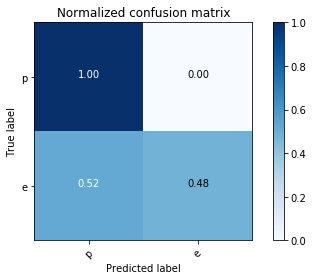

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           p       0.76      1.00      0.86      1728
           e       1.00      0.50      0.66      1094

   micro avg       0.80      0.80      0.80      2822
   macro avg       0.88      0.75      0.76      2822
weighted avg       0.85      0.80      0.79      2822

accuracy:  0.8047484053862509


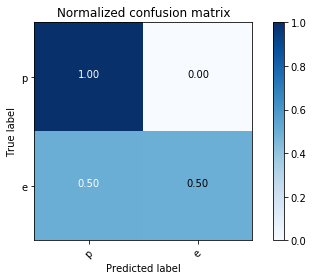

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           p       0.76      1.00      0.87      1763
           e       1.00      0.48      0.65      1059

   micro avg       0.81      0.81      0.81      2822
   macro avg       0.88      0.74      0.76      2822
weighted avg       0.85      0.81      0.78      2822

accuracy:  0.8051027639971652


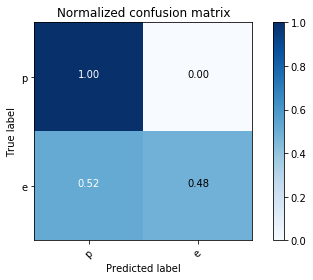

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           p       0.76      1.00      0.86      1725
           e       1.00      0.49      0.66      1097

   micro avg       0.80      0.80      0.80      2822
   macro avg       0.88      0.75      0.76      2822
weighted avg       0.85      0.80      0.78      2822

accuracy:  0.8026222537207655


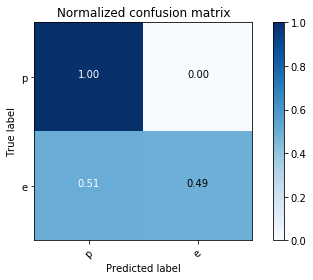

In [16]:
acc=[]
acc.append("Mushroom")
for i in range(5):
    for train_index, test_index in kf.split(mushroom):
        X_train, X_test = data_mushroom.iloc[train_index], data_mushroom.iloc[test_index]
        y_train, y_test = labels_mushroom[train_index], labels_mushroom[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        svm = SVC()
        svm.fit(X_train, y_train)
        predicted = svm.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            #print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        acc.append(accuracy_score(y_test, predicted))
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

## SVM for Appendicitis Dataset

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.75      1.00      0.86        40
           0       0.00      0.00      0.00        13

   micro avg       0.75      0.75      0.75        53
   macro avg       0.38      0.50      0.43        53
weighted avg       0.57      0.75      0.65        53

accuracy:  0.7547169811320755


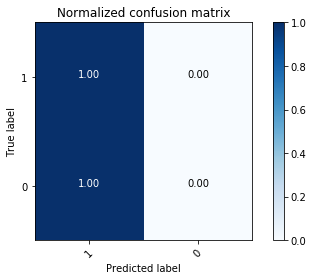

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.85      1.00      0.92        45
           0       0.00      0.00      0.00         8

   micro avg       0.85      0.85      0.85        53
   macro avg       0.42      0.50      0.46        53
weighted avg       0.72      0.85      0.78        53

accuracy:  0.8490566037735849


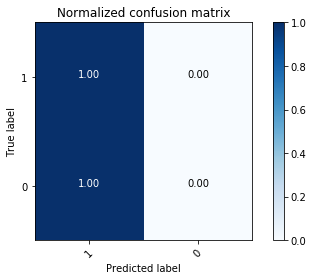

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.77      1.00      0.87        41
           0       0.00      0.00      0.00        12

   micro avg       0.77      0.77      0.77        53
   macro avg       0.39      0.50      0.44        53
weighted avg       0.60      0.77      0.67        53

accuracy:  0.7735849056603774


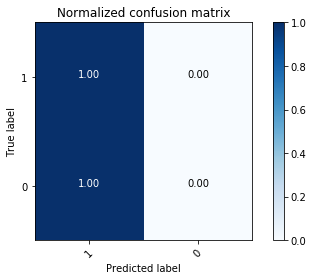

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.83      1.00      0.91        44
           0       0.00      0.00      0.00         9

   micro avg       0.83      0.83      0.83        53
   macro avg       0.42      0.50      0.45        53
weighted avg       0.69      0.83      0.75        53

accuracy:  0.8301886792452831


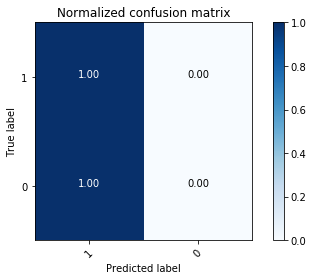

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.79      1.00      0.88        42
           0       0.00      0.00      0.00        11

   micro avg       0.79      0.79      0.79        53
   macro avg       0.40      0.50      0.44        53
weighted avg       0.63      0.79      0.70        53

accuracy:  0.7924528301886793


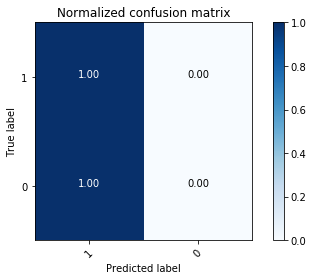

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.81      1.00      0.90        43
           0       0.00      0.00      0.00        10

   micro avg       0.81      0.81      0.81        53
   macro avg       0.41      0.50      0.45        53
weighted avg       0.66      0.81      0.73        53

accuracy:  0.8113207547169812


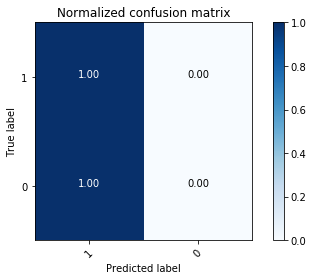

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.79      1.00      0.88        42
           0       0.00      0.00      0.00        11

   micro avg       0.79      0.79      0.79        53
   macro avg       0.40      0.50      0.44        53
weighted avg       0.63      0.79      0.70        53

accuracy:  0.7924528301886793


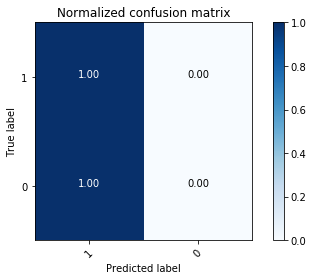

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.81      1.00      0.90        43
           0       0.00      0.00      0.00        10

   micro avg       0.81      0.81      0.81        53
   macro avg       0.41      0.50      0.45        53
weighted avg       0.66      0.81      0.73        53

accuracy:  0.8113207547169812


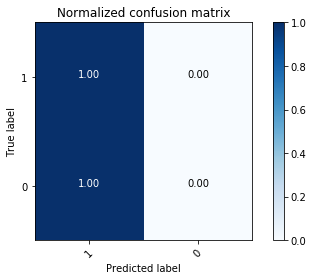

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.75      1.00      0.86        40
           0       0.00      0.00      0.00        13

   micro avg       0.75      0.75      0.75        53
   macro avg       0.38      0.50      0.43        53
weighted avg       0.57      0.75      0.65        53

accuracy:  0.7547169811320755


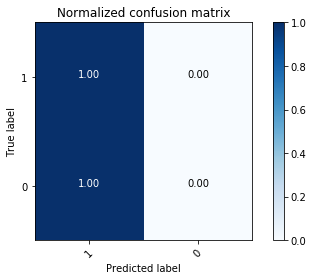

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.85      1.00      0.92        45
           0       0.00      0.00      0.00         8

   micro avg       0.85      0.85      0.85        53
   macro avg       0.42      0.50      0.46        53
weighted avg       0.72      0.85      0.78        53

accuracy:  0.8490566037735849


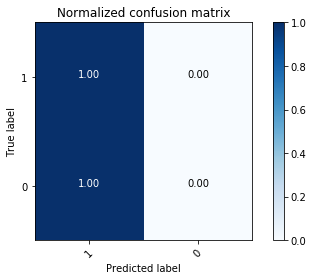

In [17]:
acc.append("Appendicitis")
for i in range(5):
    for train_index, test_index in kf.split(appendicitis):
        X_train, X_test = data_appendicitis.iloc[train_index], data_appendicitis.iloc[test_index]
        y_train, y_test = labels_appendicitis[train_index], labels_appendicitis[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        svm = SVC()
        svm.fit(X_train, y_train)
        predicted = svm.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            #print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

## SVM for Glass Dataset

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           3       0.75      0.23      0.35        40
           1       0.41      0.97      0.57        33
           2       0.00      0.00      0.00         7
           6       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         6
           7       0.81      0.87      0.84        15

   micro avg       0.50      0.50      0.50       107
   macro avg       0.33      0.34      0.29       107
weighted avg       0.52      0.50      0.42       107

accuracy:  0.5046728971962616


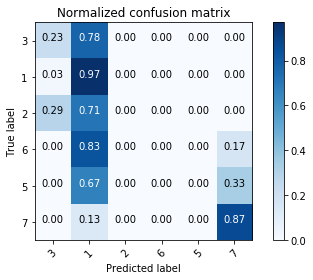

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           3       0.39      0.80      0.53        30
           1       0.48      0.33      0.39        43
           2       0.00      0.00      0.00        10
           6       0.43      0.43      0.43         7
           5       0.00      0.00      0.00         3
           7       1.00      0.71      0.83        14

   micro avg       0.48      0.48      0.48       107
   macro avg       0.38      0.38      0.36       107
weighted avg       0.46      0.48      0.44       107

accuracy:  0.4766355140186916


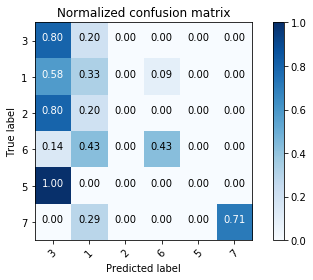

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           3       0.38      0.85      0.53        34
           1       0.38      0.17      0.24        47
           2       0.00      0.00      0.00        10
           6       0.33      0.50      0.40         2
           5       0.00      0.00      0.00         5
           7       0.86      0.67      0.75         9

   micro avg       0.41      0.41      0.41       107
   macro avg       0.33      0.36      0.32       107
weighted avg       0.37      0.41      0.34       107

accuracy:  0.411214953271028


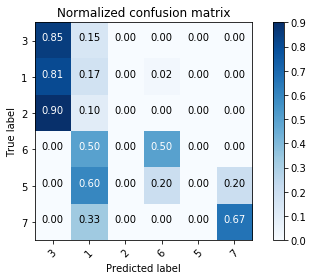

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           3       0.44      0.33      0.38        36
           1       0.35      0.69      0.47        29
           2       0.00      0.00      0.00         7
           6       0.00      0.00      0.00        11
           5       0.25      0.25      0.25         4
           7       0.89      0.85      0.87        20

   micro avg       0.47      0.47      0.47       107
   macro avg       0.32      0.35      0.33       107
weighted avg       0.42      0.47      0.43       107

accuracy:  0.4672897196261682


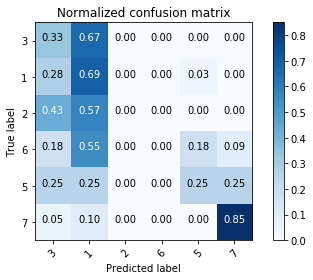

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           3       0.63      0.32      0.43        37
           1       0.49      0.89      0.63        37
           2       0.00      0.00      0.00         5
           6       0.50      0.29      0.36         7
           5       1.00      0.75      0.86         4
           7       0.92      0.71      0.80        17

   micro avg       0.58      0.58      0.58       107
   macro avg       0.59      0.49      0.51       107
weighted avg       0.60      0.58      0.55       107

accuracy:  0.5794392523364486


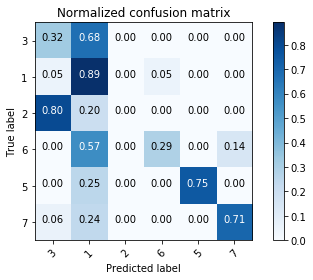

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           3       0.44      0.82      0.57        33
           1       0.44      0.38      0.41        39
           2       0.00      0.00      0.00        12
           6       1.00      0.33      0.50         6
           5       0.00      0.00      0.00         5
           7       1.00      0.83      0.91        12

   micro avg       0.50      0.50      0.50       107
   macro avg       0.48      0.39      0.40       107
weighted avg       0.47      0.50      0.46       107

accuracy:  0.5046728971962616


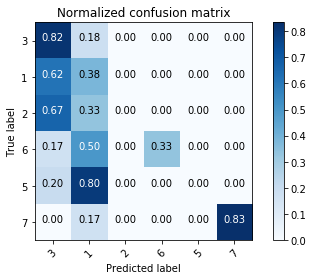

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           3       0.58      0.57      0.58        37
           1       0.55      0.71      0.62        41
           2       0.00      0.00      0.00         7
           6       1.00      0.12      0.22         8
           5       0.20      1.00      0.33         1
           7       1.00      0.92      0.96        13

   micro avg       0.60      0.60      0.60       107
   macro avg       0.56      0.55      0.45       107
weighted avg       0.61      0.60      0.57       107

accuracy:  0.5981308411214953


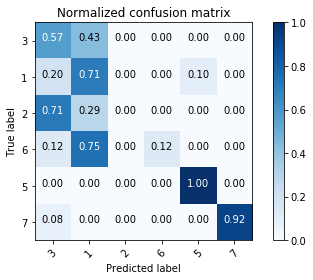

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           3       0.40      0.48      0.44        33
           1       0.40      0.60      0.48        35
           2       0.00      0.00      0.00        10
           6       0.25      0.20      0.22         5
           5       0.00      0.00      0.00         8
           7       1.00      0.69      0.81        16

   micro avg       0.46      0.46      0.46       107
   macro avg       0.34      0.33      0.33       107
weighted avg       0.42      0.46      0.43       107

accuracy:  0.45794392523364486


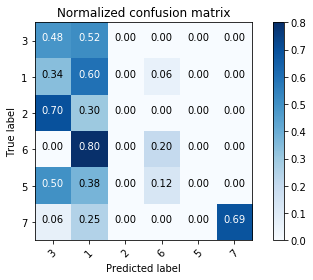

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           3       0.76      0.40      0.52        40
           1       0.46      0.86      0.60        36
           2       0.00      0.00      0.00         7
           6       0.50      0.60      0.55         5
           5       0.50      0.25      0.33         4
           7       1.00      0.67      0.80        15

   micro avg       0.57      0.57      0.57       107
   macro avg       0.54      0.46      0.47       107
weighted avg       0.62      0.57      0.55       107

accuracy:  0.5700934579439252


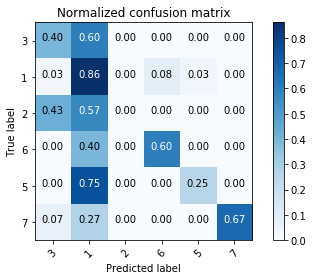

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           3       0.43      0.83      0.57        30
           1       0.51      0.45      0.48        40
           2       0.00      0.00      0.00        10
           6       0.00      0.00      0.00         8
           5       0.00      0.00      0.00         5
           7       0.79      0.79      0.79        14

   micro avg       0.50      0.50      0.50       107
   macro avg       0.29      0.34      0.31       107
weighted avg       0.42      0.50      0.44       107

accuracy:  0.5046728971962616


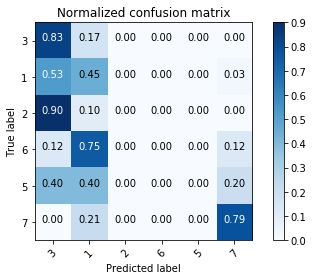

In [18]:
acc.append("Glass")
for i in range(5):
    for train_index, test_index in kf.split(Glass):
        X_train, X_test = data_Glass.iloc[train_index], data_Glass.iloc[test_index]
        y_train, y_test = labels_Glass[train_index], labels_Glass[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        svm = SVC()
        svm.fit(X_train, y_train)
        predicted = svm.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            #print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        acc.append(accuracy_score(y_test, predicted))
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

In [19]:
with open("accSVMWith33Noise.csv", 'w') as myfile:
    wr = csv.writer(myfile, delimiter='\n')
    wr.writerow(acc)